### **Libraries**

In [186]:
#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Evaluation
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

### **EDA**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
path ='/kaggle/input/titanic-dataset/Titanic-Dataset.csv'

In [ ]:
df = pd.read_csv(path,index_col='PassengerId')

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.shape

(891, 11)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex'>

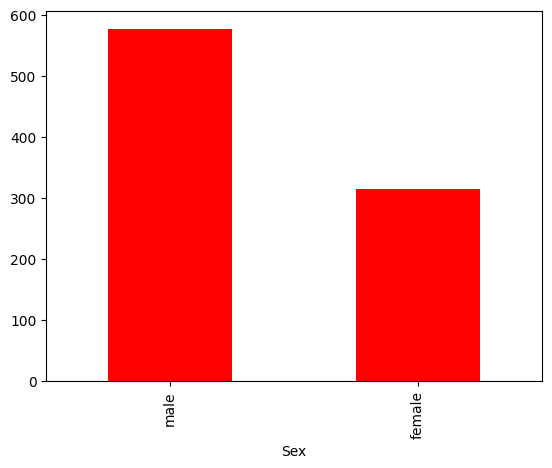

In [ ]:
df['Sex'].value_counts().plot(kind='bar',color='red')

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
Total = df['Survived'].value_counts().sum()
Survived = df['Survived'].value_counts()[1]

Survived_Percentage = (Survived/Total)*100
print(f"{Survived_Percentage:.2f}%")

38.38%


<Axes: xlabel='Survived'>

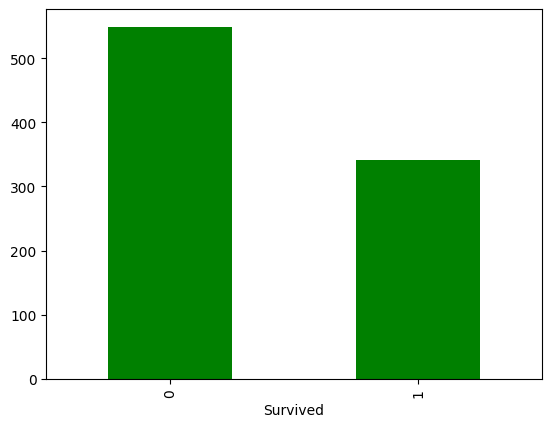

In [ ]:
df['Survived'].value_counts().plot(kind='bar',color='green')

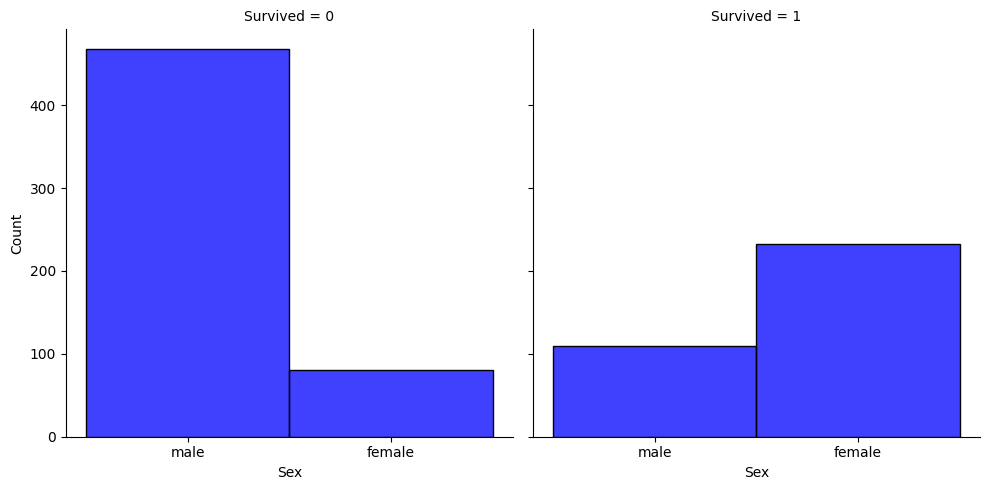

In [ ]:
sns.displot(data=df, x='Sex', col='Survived', bins=9,color='blue')
plt.show()

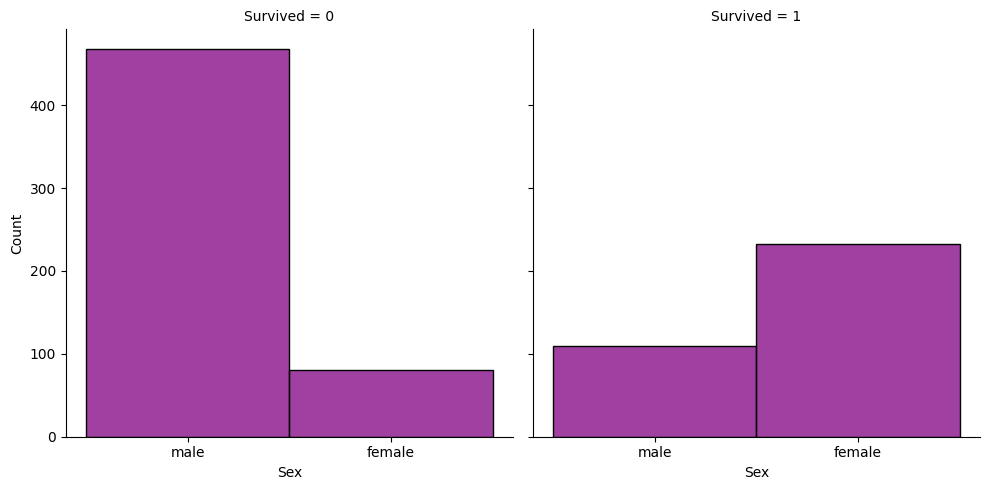

In [ ]:
sns.displot(data=df, x='Sex', col='Survived', bins=9,color='purple')
plt.show()

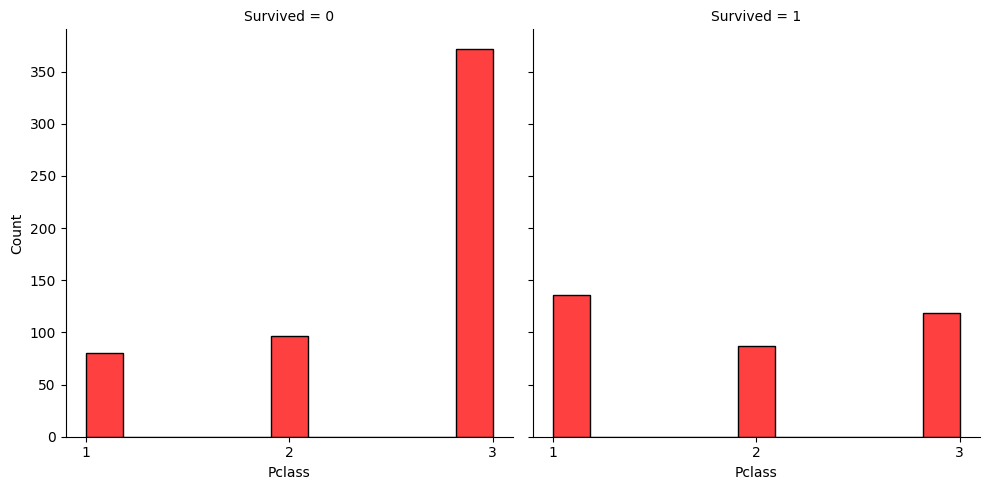

In [ ]:
sns.displot(data=df, x='Pclass', col='Survived',color='red')
plt.xticks([1,2,3])
plt.show()

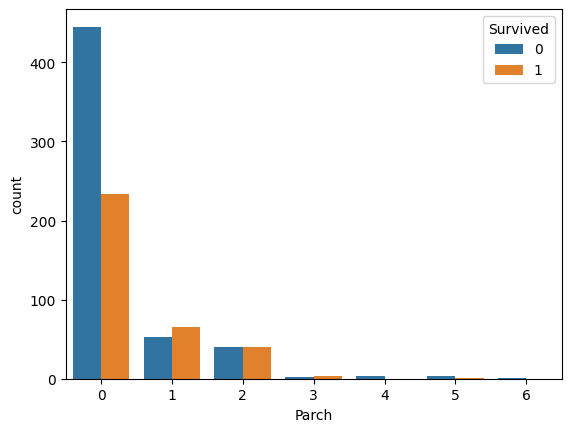

In [ ]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.show()

### **Data Preprocessing**

In [ ]:
df= df.drop(columns=['Name','Cabin','Ticket'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])

In [ ]:
df['Sex'].head()

,Sex
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [ ]:
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [ ]:
df['Embarked'].unique()

array([2, 0, 1, 3])

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


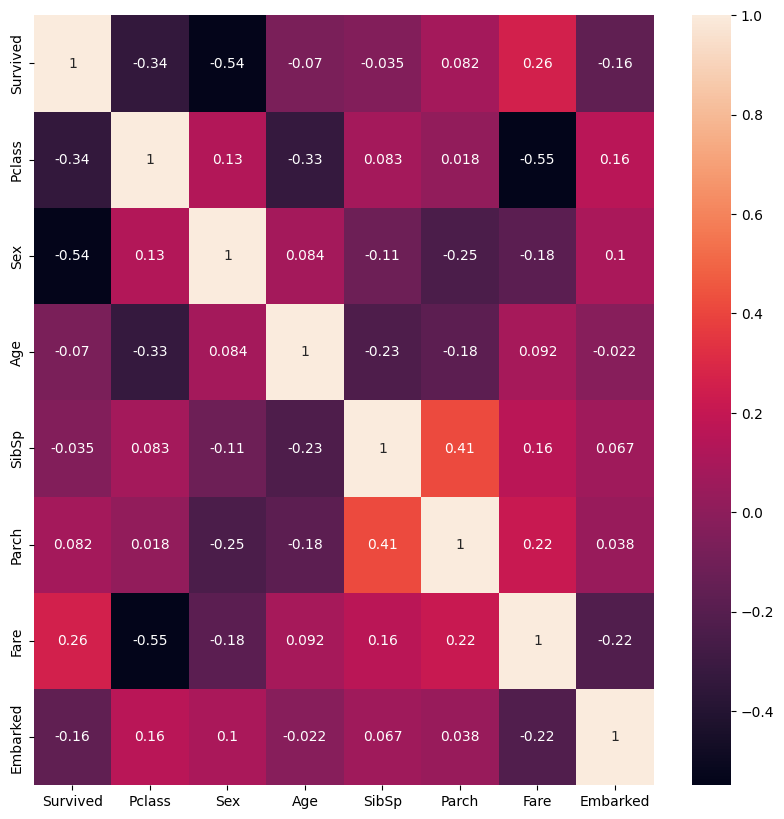

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [ ]:
scalar=MinMaxScaler()
X=scalar.fit_transform(X)

In [ ]:
y.shape

(891, 1)

In [ ]:
y=y.reshape(-1,1)

In [ ]:
y.shape

(891, 1)

In [ ]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

### **Models**
`(Logistic Regression , Decision Tree , Random Forest , KNN , SVM , Naive Bayes)`

**Logistic Regression**


In [ ]:
LG=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
LG.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
LG.score(X_train,y_train)

0.7991573033707865

In [145]:
y_pred=LG.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.793


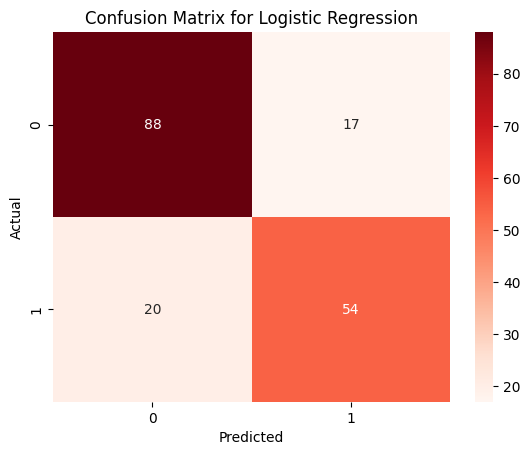

In [154]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Decision Tree**

In [ ]:
DT =DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_train,y_train)

0.9803370786516854

In [144]:
y_pred=DT.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.782


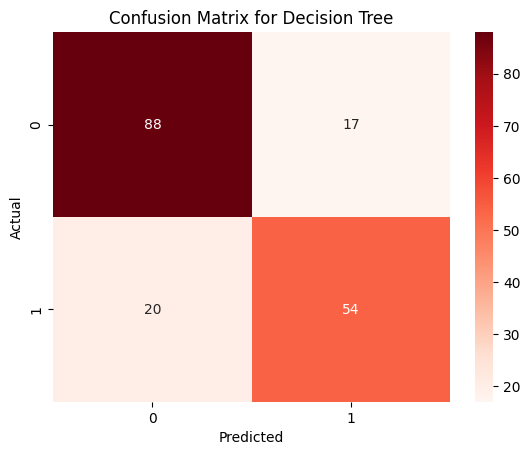

In [153]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

**Random Forest**

In [ ]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
RF.score(X_train,y_train)

0.9803370786516854

In [142]:
y_pred=RF.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.804


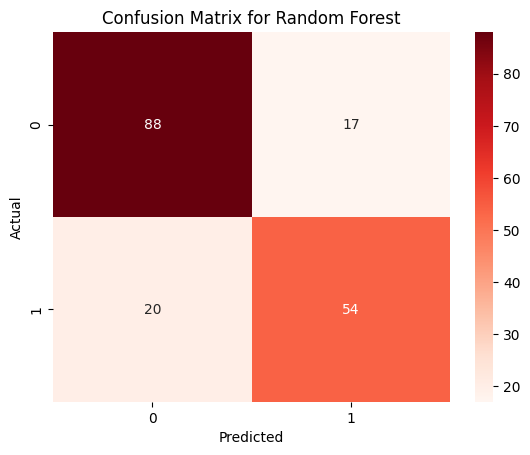

In [152]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**KNN**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
KNN.score(X_train,y_train)

0.8581460674157303

In [143]:
y_pred=KNN.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.810


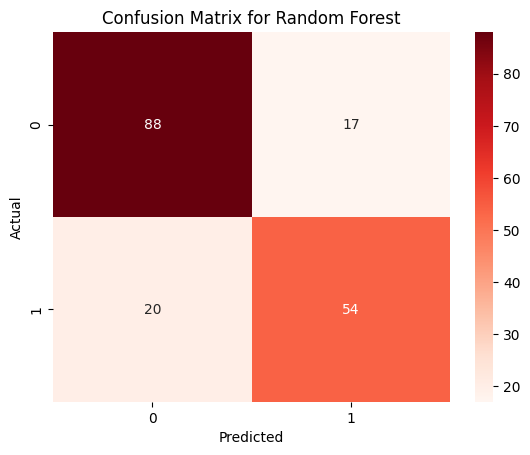

In [151]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**SVM**

In [159]:
SVM=SVC(kernel='rbf',C=0.1)
SVM.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1)

In [160]:
SVM.score(X_train, y_train)

0.800561797752809

In [161]:
y_pred=SVM.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.782


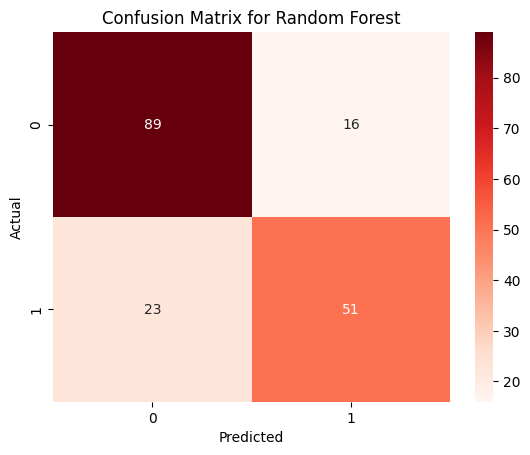

In [162]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**Naive Bayes**

In [175]:
NB=GaussianNB()
NB.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [176]:
NB.score(X_train,y_train)

0.7991573033707865

In [177]:
y_pred=NB.predict(X_test)
print(f"Score = {accuracy_score(y_test,y_pred):.3f}")

Score = 0.777


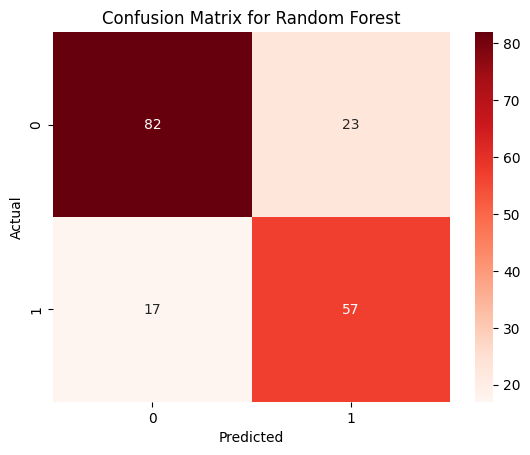

In [178]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Random Forest appears to be the best model among the ones trained so far.
It has the highest accuracy **score of 0.804 (80.4%)** on the test set.

Looking at the confusion matrix for Random Forest, it has a good balance of correctly predicting both '0' (not survived) and '1' (survived) cases, with 88 true negatives and 54 true positives.

**In summary, Random Forest seems to be the most balanced and accurate model based on the provided confusion matrices and accuracy scores.**